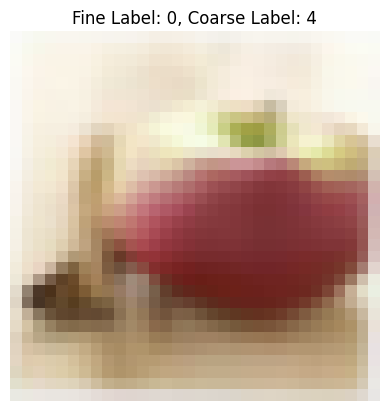

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

#define the function to unpickle the CIFAR-100 train file
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#load the CIFAR-100 train data
data = unpickle('Data/train')

#extract the first image and its labels
image_data = data[b'data'][2] 
fine_label = data[b'fine_labels'][2]  
coarse_label = data[b'coarse_labels'][2]  

#reshape the data to form a 3D array (32, 32, 3)
image = image_data.reshape(3, 32, 32).transpose(1, 2, 0)

#display the image
plt.imshow(image)
plt.title(f'Fine Label: {fine_label}, Coarse Label: {coarse_label}')
plt.axis('off')
plt.show()


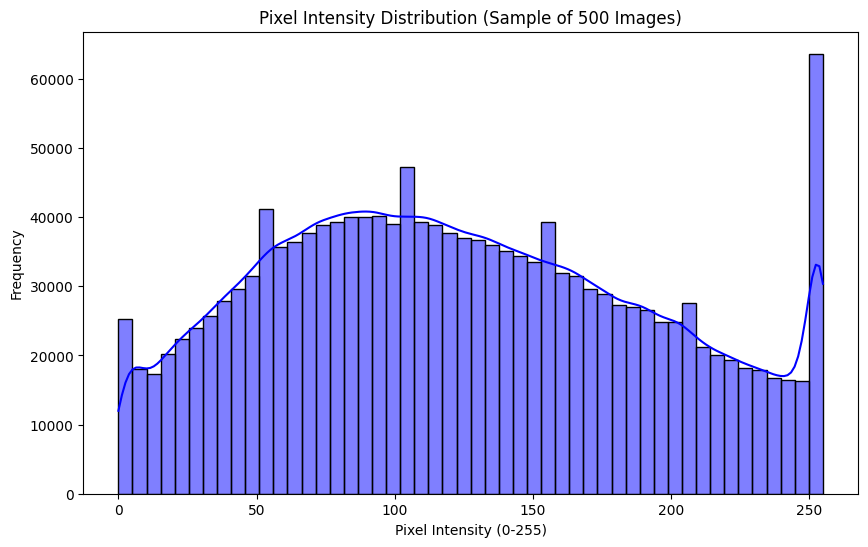

In [ ]:
import seaborn as sns

#take a smaller sample of 500 images for analysis
sample_data = data[b'data'][:500]

#reshape into images and flatten pixel intensities
sample_images = sample_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1) 
pixel_intensities = sample_images.flatten()

#plot the distribution of pixel intensities
plt.figure(figsize=(10, 6))
sns.histplot(pixel_intensities, bins=50, kde=True, color='blue')
plt.title("Pixel Intensity Distribution (Sample of 500 Images)")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()


C:\Users\zaidf\AppData\Local\Temp\ipykernel_41616\3210036878.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fine_label', data=df, palette='viridis')


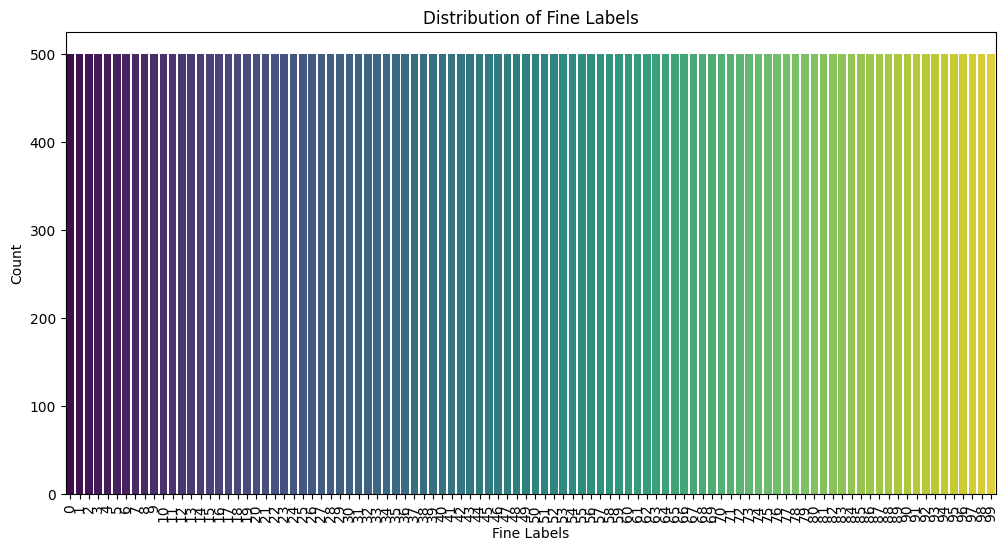

C:\Users\zaidf\AppData\Local\Temp\ipykernel_41616\3210036878.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='coarse_label', data=df, palette='plasma')


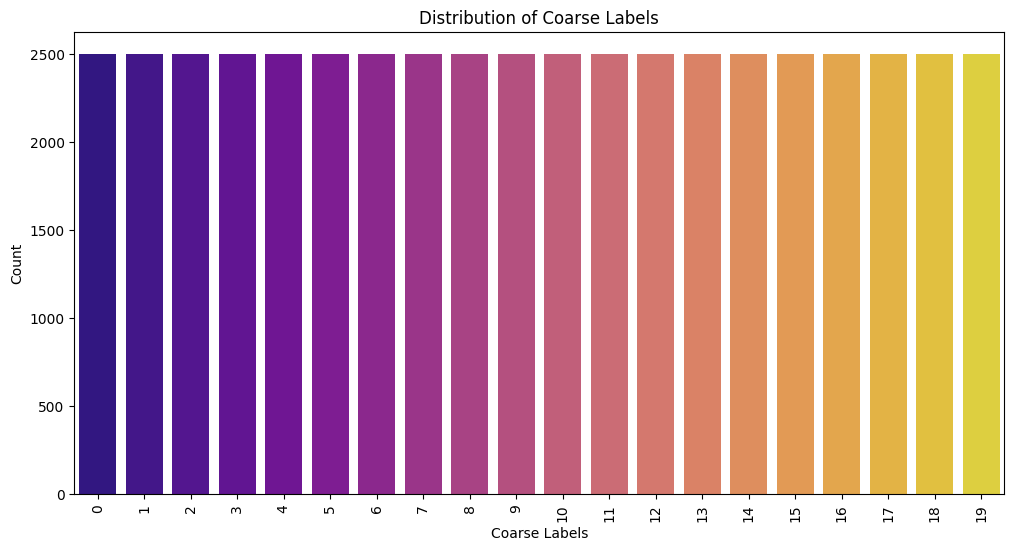

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data = unpickle('Data/train')

#convert data to DataFrame for analysis
df = pd.DataFrame({
    'data': list(data[b'data']),
    'fine_label': data[b'fine_labels'],
    'coarse_label': data[b'coarse_labels']
})

# 1. Distribution of Fine Labels
plt.figure(figsize=(12, 6))
sns.countplot(x='fine_label', data=df, palette='viridis')
plt.title("Distribution of Fine Labels")
plt.xlabel("Fine Labels")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# 2. Distribution of Coarse Labels
plt.figure(figsize=(12, 6))
sns.countplot(x='coarse_label', data=df, palette='plasma')
plt.title("Distribution of Coarse Labels")
plt.xlabel("Coarse Labels")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


In [ ]:
import pickle
import pandas as pd
from collections import Counter

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train_data = unpickle('Data/train')

#load meta data to get coarse label names
meta_data = unpickle('Data/meta')
coarse_label_names = [label.decode('utf-8') for label in meta_data[b'coarse_label_names']]

df = pd.DataFrame({
    'Coarse Label': train_data[b'coarse_labels']
})

#count occurrences of each coarse label
coarse_counts = Counter(df['Coarse Label'])

#map counts to coarse label names
coarse_count_named = {coarse_label_names[label]: count for label, count in coarse_counts.items()}

#display the counts in each superclass
print("Number of Images in Each Superclass Group:")
for superclass, count in coarse_count_named.items():
    print(f"{superclass}: {count}")


Number of Images in Each Superclass Group:
large_omnivores_and_herbivores: 2500
reptiles: 2500
fruit_and_vegetables: 2500
people: 2500
fish: 2500
household_electrical_devices: 2500
vehicles_1: 2500
food_containers: 2500
large_natural_outdoor_scenes: 2500
trees: 2500
flowers: 2500
large_man-made_outdoor_things: 2500
large_carnivores: 2500
small_mammals: 2500
household_furniture: 2500
medium_mammals: 2500
vehicles_2: 2500
insects: 2500
non-insect_invertebrates: 2500
aquatic_mammals: 2500


C:\Users\zaidf\AppData\Local\Temp\ipykernel_41616\1413760325.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coarse_count_df, x='Superclass', y='Image Count', palette='viridis')


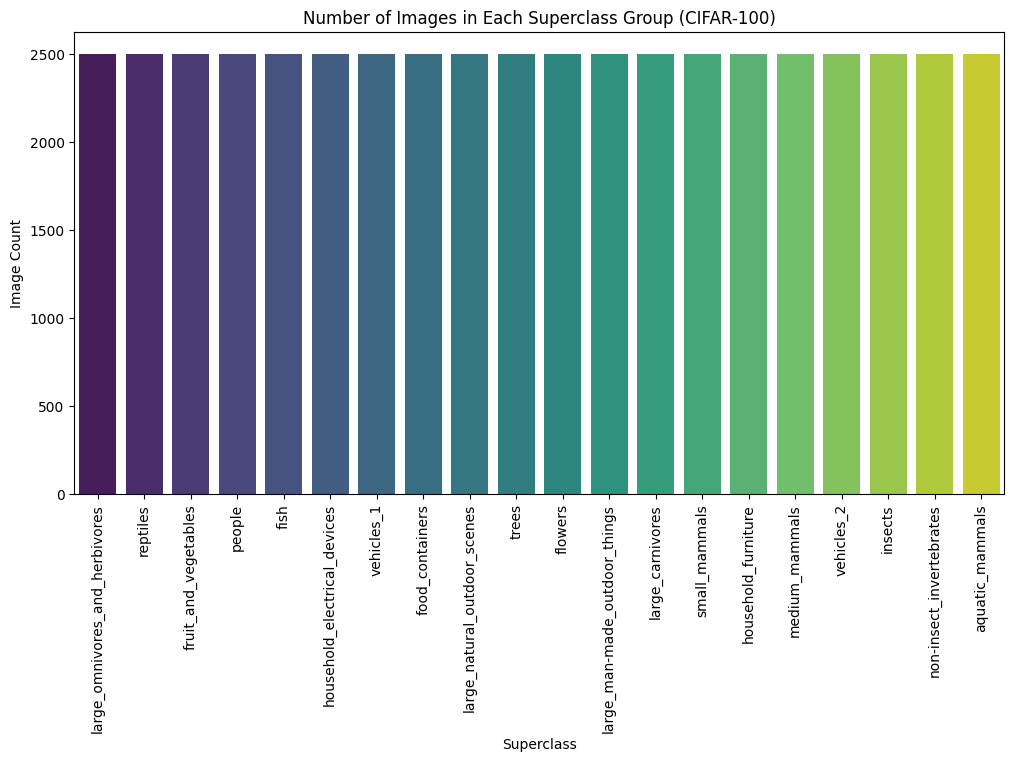

In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

train_data = unpickle('Data/train')
meta_data = unpickle('Data/meta')

coarse_label_names = [label.decode('utf-8') for label in meta_data[b'coarse_label_names']]

df = pd.DataFrame({'Coarse Label': train_data[b'coarse_labels']})

coarse_counts = Counter(df['Coarse Label'])

#map counts to coarse label names
coarse_count_named = {coarse_label_names[label]: count for label, count in coarse_counts.items()}
coarse_count_df = pd.DataFrame(list(coarse_count_named.items()), columns=['Superclass', 'Image Count'])

#plotting the number of images in each superclass
plt.figure(figsize=(12, 6))
sns.barplot(data=coarse_count_df, x='Superclass', y='Image Count', palette='viridis')
plt.title("Number of Images in Each Superclass Group (CIFAR-100)")
plt.xlabel("Superclass")
plt.ylabel("Image Count")
plt.xticks(rotation=90)
plt.show()


In [ ]:
import pickle
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

train_data = unpickle('Data/train')
meta_data = unpickle('Data/meta')

#define animal superclasses that we are interested in 
animal_superclasses = [
    'aquatic_mammals', 'fish', 'insects', 'large_carnivores',
    'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates',  
    'reptiles', 'small_mammals'
]

#decode the superclass names from metadata
coarse_label_names = [label.decode('utf-8') for label in meta_data[b'coarse_label_names']]

#get the indices of the animal superclasses
animal_indices = [i for i, label in enumerate(coarse_label_names) if label in animal_superclasses]

#filter out images that belong to non-animal superclasses
filtered_images = []
filtered_fine_labels = []
filtered_coarse_labels = []

for i in range(len(train_data[b'coarse_labels'])):
    if train_data[b'coarse_labels'][i] in animal_indices:
        filtered_images.append(train_data[b'data'][i])
        filtered_fine_labels.append(train_data[b'fine_labels'][i])
        filtered_coarse_labels.append(train_data[b'coarse_labels'][i])

#convert lists back to numpy arrays
filtered_images = np.array(filtered_images)
filtered_fine_labels = np.array(filtered_fine_labels)
filtered_coarse_labels = np.array(filtered_coarse_labels)

#display the number of images after filtering
print(f"Number of images after filtering: {len(filtered_images)}")

Number of images after filtering: 22500
